![titanic](titanic.jpg)


In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import style
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv('titanic_data.csv')
heatmap_data = pd.read_csv('titanic_data.csv')

<h1 style="font-family:verdana; color:blue">Exploratory Data Analysis (EDA)</h1>

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.shape

(891, 12)

In [5]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

sibsp:    # of siblings / spouses aboard the Titanic     
parch:    # of parents / children aboard the Titanic     
ticket:    Ticket number     
fare:    Passenger fare     
cabin:    Cabin number     
embarked:    Port of Embarkation

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


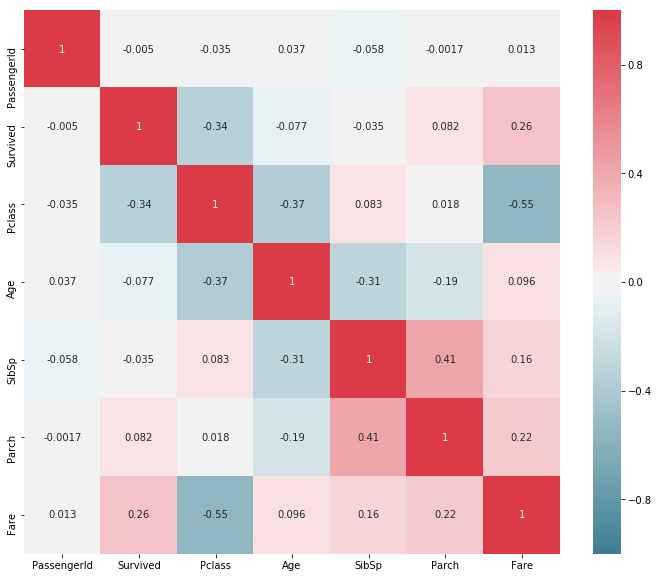

In [8]:
fig,ax = plt.subplots(figsize=(12,10))
cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
ax = sns.heatmap(heatmap_data.corr(), vmin= -1, vmax= 1, annot=True, cmap=cmap )

What data is actually missing?

In [9]:
missing_count = data.isnull().sum().sort_values(ascending=False)
percentage = (missing_count / data.shape[0]) *100
percentage = round(percentage,1)
missing_df = pd.concat([missing_count, percentage], keys = ['Total Missing', '%'], axis=1) 
print(missing_df.head(3))

          Total Missing     %
Cabin               687  77.1
Age                 177  19.9
Embarked              2   0.2


- `Embarked` feature has only 2 missing values, which can easily be filled.
- `Age` has 177 missing values which are 19% of the whole dataset, so it can be filled but more trickier than the `Embarked`
- 77% of the `Cabin` values are missing so we might drop it.

Deleting features that's not important/not contribute to the survival of passengers.

In [10]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

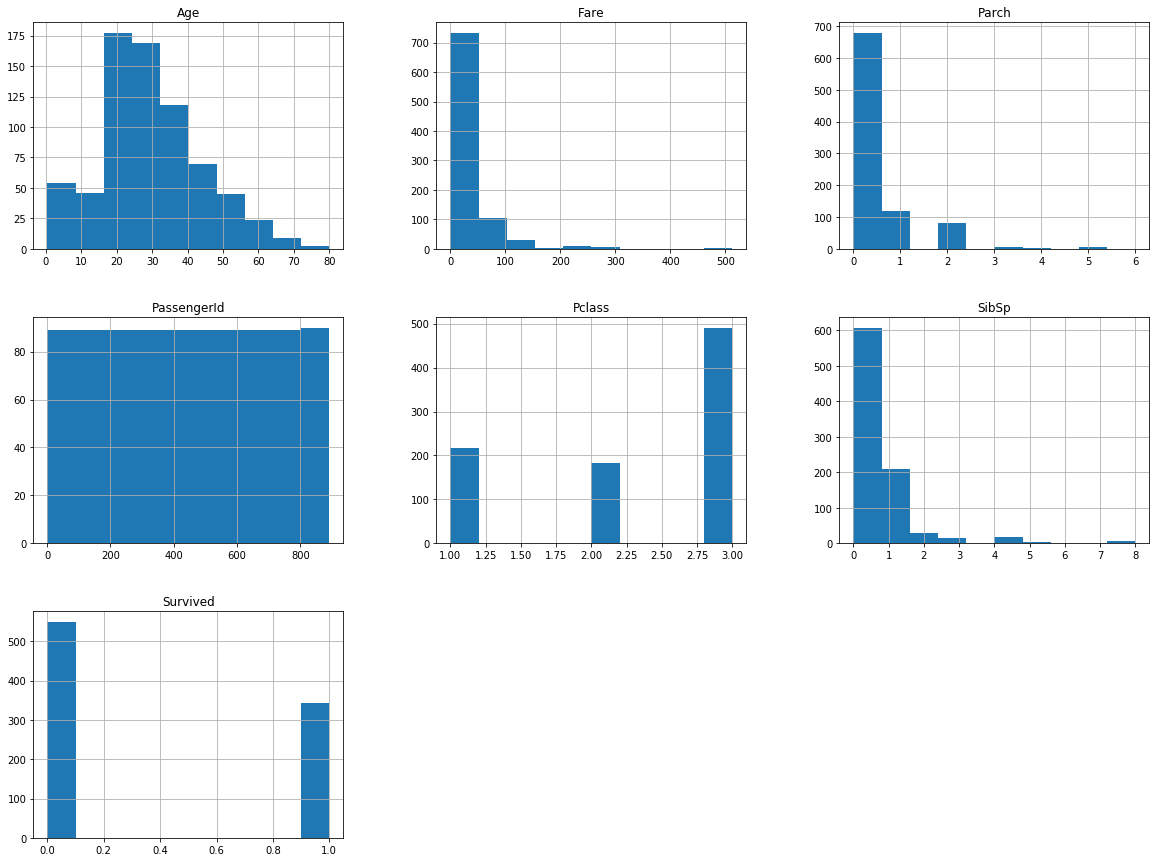

In [11]:
data.hist(bins=10, figsize=(20,15))
plt.show()

In [12]:
df = data

In [13]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [14]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [15]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

## Age, Sex and Survival

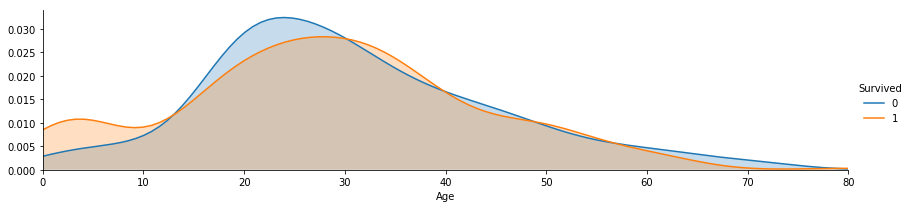

In [16]:
FacetGrid = sns.FacetGrid(df, hue='Survived', aspect=4)
FacetGrid.map(sns.kdeplot, 'Age', shade=True)
FacetGrid.set(xlim=(0, df['Age'].max()))
FacetGrid.add_legend()

male
Number of  male :  577
Number of  male Survived:  109
Percantage of  male survived:  18.89 %


female
Number of  female :  314
Number of  female Survived:  233
Percantage of  female survived:  74.20 %




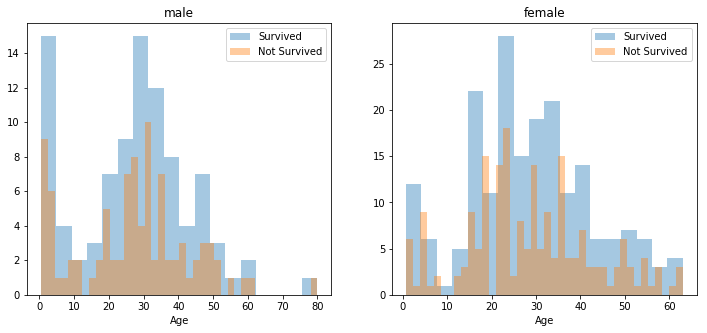

In [17]:
survived = 'Survived'
not_survived = 'Not Survived'
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))


for i,gen in enumerate(df['Sex'].unique()):
    print(gen)
    gender = df[df['Sex'] == gen]
    print("Number of ", gen, ": ", gender.shape[0])
    gender_survived = gender[gender['Survived'] == 1]
    gender_not_survived = gender[gender['Survived'] == 0]
    print("Number of ", gen, "Survived: ", gender_survived.shape[0])
    survival_percentage = (gender_survived.shape[0] / gender.shape[0])*100
    print("Percantage of ", gen, "survived: ", "%.2f" % survival_percentage, "%")
    print("\n ====== \n")
    
    
    #plot
    ax = sns.distplot(gender_survived.Age.dropna(), bins= 18, label= survived, ax= axes[i], kde=False)
    ax = sns.distplot(gender_survived.Age.dropna(), bins=40, label= not_survived, ax= axes[i], kde=False)
    ax.legend()
    ax.set_title(gen)
plt.show()
    

`Age` vs. `Sex` Survival  Observation
===========================================

**Male:**

Males between 18 to 30 years old are most likely to survive.

**Female:**

Females between 15 to 40 are most likely to survive.

**Infants:**

 Infants also have higher probability of survival.

## Embarked, Pclass and Sex:




/home/noreen/anaconda3/lib/python3.5/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


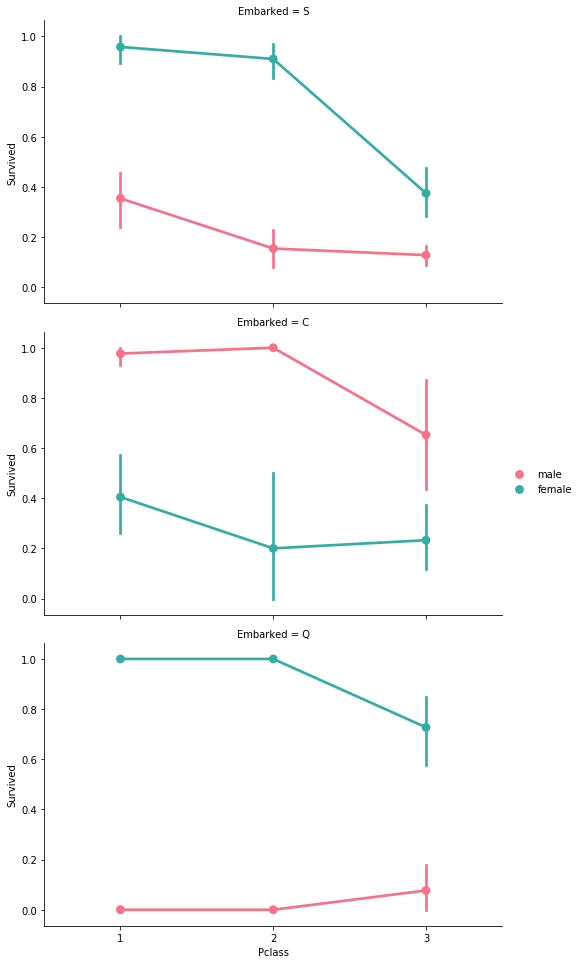

In [18]:
FacetGrid = sns.FacetGrid(df, row='Embarked', size= 4.5, aspect= 1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette="husl", order=None, hue_order=None)
FacetGrid.add_legend()

### Embarked, Pclass and Sex **Observation**:

**Female:**
Females are more likely to survive on port Q and S, while they have less chance of survival on port C.

**Male:**
Males have higher chance of survival on port C and less chance of survival on port Q and S.

_**Note:**_ It seems like the `Pclass` is also correlated with survival rate so we need to investigate more on that.


## Pclass vs. Survival

In [19]:
for cls in df['Pclass'].unique():
    print("class: ", cls)
    cls_passengers = df[df['Pclass'] == cls]
    print("Number of passengers in class", cls, ": ",  cls_passengers.shape[0])
    cls_survived = cls_passengers[cls_passengers['Survived'] == 1]
    print("Number of passengers survived in class ", cls, ":", cls_survived.shape[0])
    cls_survival_percentage = (cls_survived.shape[0] / cls_passengers.shape[0])*100
    print("Percantage of passengers survived in class ",cls, ": ", "%.2f" % cls_survival_percentage, "%") 
    print("\n ====== \n")

class:  3
Number of passengers in class 3 :  491
Number of passengers survived in class  3 : 119
Percantage of passengers survived in class  3 :  24.24 %


class:  1
Number of passengers in class 1 :  216
Number of passengers survived in class  1 : 136
Percantage of passengers survived in class  1 :  62.96 %


class:  2
Number of passengers in class 2 :  184
Number of passengers survived in class  2 : 87
Percantage of passengers survived in class  2 :  47.28 %




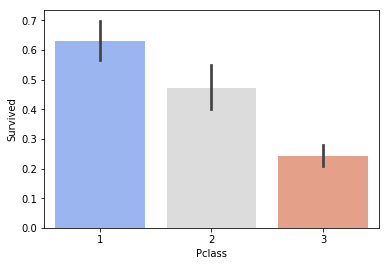

In [20]:
sns.barplot(data=df, x='Pclass', y='Survived', palette='coolwarm')

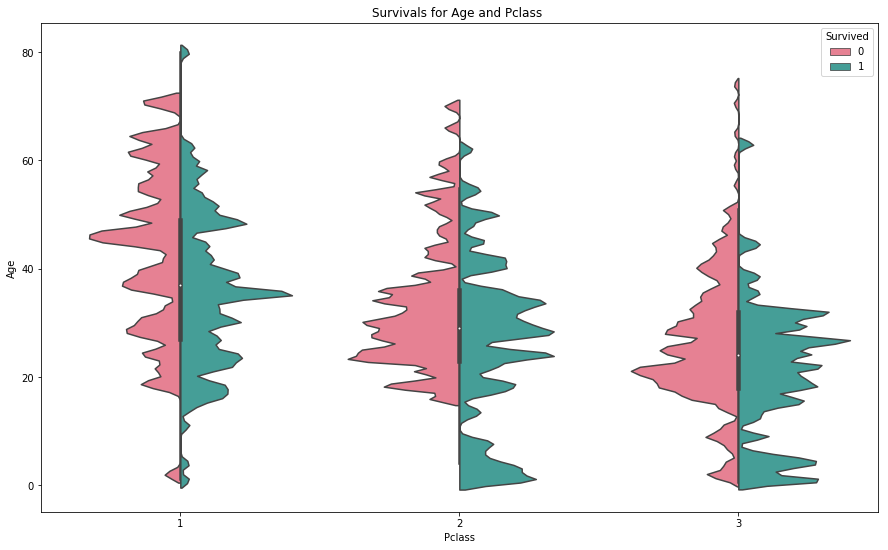

In [21]:
fig, ax = plt.subplots(figsize=(15,9))
sns.violinplot(x="Pclass", y="Age", hue='Survived', data=df, split=True, bw=0.05 , palette='husl', ax=ax)
plt.title('Survivals for Age and Pclass ')
plt.show()

/home/noreen/anaconda3/lib/python3.5/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/noreen/anaconda3/lib/python3.5/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


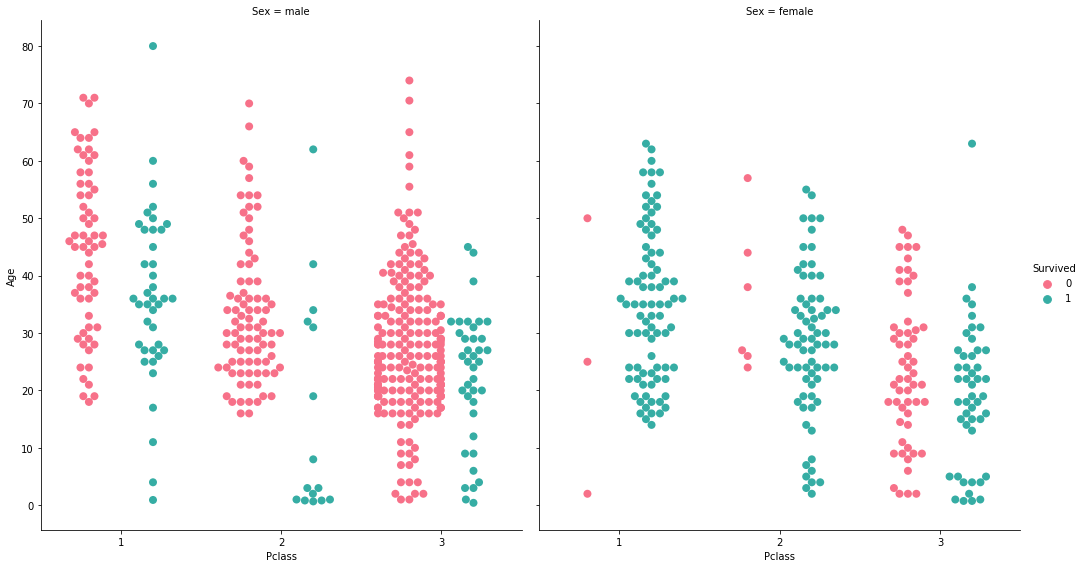

In [22]:
g = sns.factorplot(x="Pclass", y="Age", hue="Survived", col="Sex", data=df, kind="swarm", dodge=True, palette='husl', size=8, aspect=.9, s=8)

## Pclass vs. Survival Observation
A person in Pclass 1 has high probability to survive while the inverse is True for Pclass 3 which has a high probability not to survive. 

## SibSp and Parch:

In [23]:
for dataset in [df]:
    dataset['Relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['Relatives'] > 0, 'Alone'] = 0
    dataset.loc[dataset['Relatives'] == 0, 'Alone'] =1
    dataset['Alone'] = dataset['Alone'].astype(int)
pd.crosstab(df.Relatives,df.Survived).apply(lambda r: r/r.sum(), axis=1).style.background_gradient(cmap='summer_r')


Survived,0,1
Relatives,,
0,0.696462,0.303538
1,0.447205,0.552795
2,0.421569,0.578431
3,0.275862,0.724138
4,0.8,0.2
5,0.863636,0.136364
6,0.666667,0.333333
7,1,0
10,1,0


/home/noreen/anaconda3/lib/python3.5/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


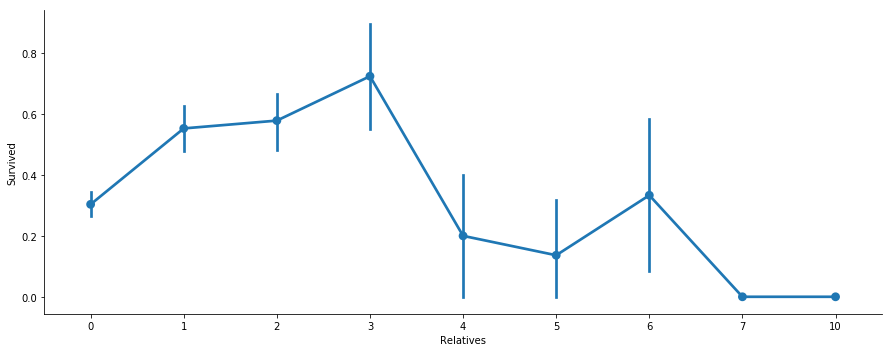

In [24]:
sns.factorplot('Relatives', 'Survived', data = df, aspect=2.5)

## SibSp and Parch Observation:
If a person has siblings between 1 to 3 then he has a higher probability of survivial, while having number of siblings less than 1 or greater than 3 makes the chance of survival very low except for some cases with 6 siblings.

=========================================================================================

=========================================================================================

<h1 style="font-family:verdana; color:blue"> Feature Engineering - DATA WRANGLING </h1>

1) Dropping Features that may not contribute to survival

- `Ticket` feature may be dropped from our analysis as it contains high ratio of duplicates (22%) and there may not be a correlation between Ticket and survival.

- `Cabin` feature may be dropped as it is highly incomplete or contains many null values.

- `PassengerId` may be dropped from training dataset as it does not contribute to survival.

In [25]:
print('No. of columns before dropping: ', df.shape[1])
df.drop(['Ticket', 'Cabin', 'PassengerId'], axis=1, inplace=True)
print('No. of columns After dropping: ', df.shape[1])


No. of columns before dropping:  14
No. of columns After dropping:  11


2)`Name` feature:  Names may not correlate with the survival so we want to drop it, but first, what if the Titles of names itself correlate with the survival? 

We need to investigate that before dropping the name feature so, we are going to replace names by it's Titles first using Regular Expressions RegEX  pattern (\w+\.) matches the first word which ends with a dot character within Name feature.

In [26]:
for dataset in [df]:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(df['Sex'], df['Title']).style.background_gradient(cmap='summer_r')

Title,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


Replacing raraly used titles with rare and replacing other titles with a more common one.

In [27]:
for dataset in [df]:
    dataset['Title']= dataset['Title'].replace(['Capt', 'Col', 'Countess', 'Don', 'Dr', 'Jonkheer',\
                                                 'Lady', 'Major', 'Rev', 'Sir'],'Rare')
    dataset['Title']= dataset['Title'].replace(['Mlle', 'Ms'], 'Miss')
    dataset['Title']= dataset['Title'].replace('Mme', 'Mrs')
df[['Title', 'Survived']]. groupby(['Title'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Title,Survived
3,Mrs,0.793651
1,Miss,0.702703
0,Master,0.575000
4,Rare,0.347826
2,Mr,0.156673


Convert categorical data to ordinal

In [28]:
Title_mapping={"Mrs":1, "Miss":2, "Mr":3, "Master":4, "Rare":5}
for dataset in [df]:
    dataset['Title'] = dataset['Title'].map(Title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Relatives,Alone,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1,0,3
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1,0,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0,1,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1,0,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0,1,3


Now, after extracting Titles from Names we can safely drop the `Name` feature.

In [29]:
df.drop(['Name'], axis=1, inplace=True)

## Converting String values into numerical.
Most models need all values to be numerical in order to perform better.

3) converting categorical `Sex` values into Numerical discrete categories.

In [30]:
for dataset in [df]:
    dataset['Sex'] = dataset['Sex']. map({"male":0, "female":1}).astype(int)
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Relatives,Alone,Title
0,0,3,0,22.0,1,0,7.2500,S,1,0,3
1,1,1,1,38.0,1,0,71.2833,C,1,0,1


# completing missing Values

### Completing Age values.

/home/noreen/anaconda3/lib/python3.5/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


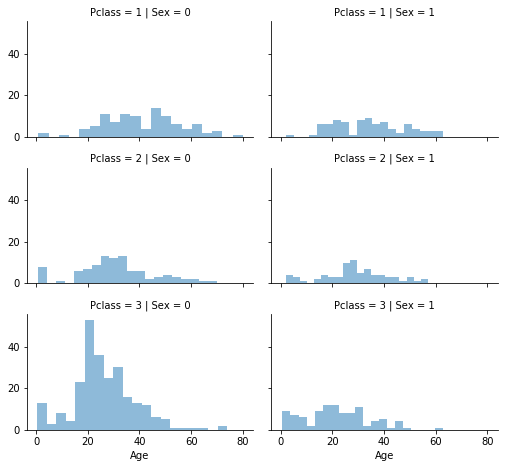

In [31]:
grid = sns.FacetGrid(df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

`Age` feature is a continous feature.

the method that we will confirm for filling missing `Age` values is:
    
> An accurate way of guessing missing values is to use other correlated features. In our case we note correlation among Age, Gender, and Pclass. Guess Age values using median values for Age across sets of Pclass and Gender feature combinations. So, median Age for Pclass=1 and Gender=0, Pclass=1 and Gender=1, and so on...



In [32]:
df['Age'] = df.groupby(['Survived','Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))
df['Age'] = df['Age'].astype(int)

### Converting Age into ordinal by making Age categories


In [33]:
df['Age_Cat'] = df['Age']
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Relatives,Alone,Title,Age_Cat
0,0,3,0,22,1,0,7.2500,S,1,0,3,22
1,1,1,1,38,1,0,71.2833,C,1,0,1,38
2,1,3,1,26,0,0,7.9250,S,0,1,2,26


In [34]:
def age_to_cat(age):
    if age <4:
        return 0 #baby
    elif age <10:
        return 1 #child
    elif age <21:
        return 2 #teen
    elif age <33:
        return 3 #young adult
    elif age <50: #adult
        return 4
    return 5 #elder

age_cat = {
    0: "baby",
    1: "child",
    2: "teen",
    3: "yound adult",
    4: "adult",
    5: "elder"
}

In [35]:
df['Age_Cat'] = df['Age_Cat'].apply(age_to_cat)
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Relatives,Alone,Title,Age_Cat
0,0,3,0,22,1,0,7.2500,S,1,0,3,3
1,1,1,1,38,1,0,71.2833,C,1,0,1,4
2,1,3,1,26,0,0,7.9250,S,0,1,2,3


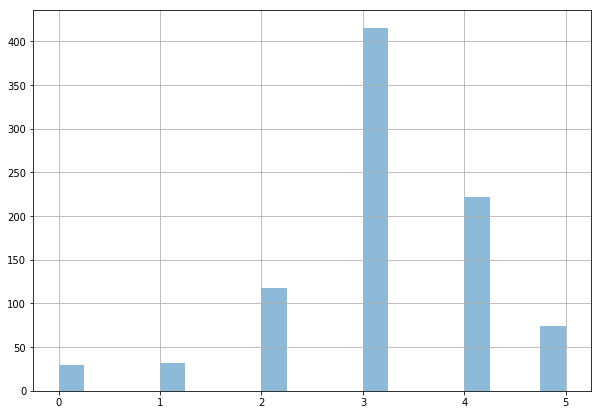

In [36]:
df['Age_Cat'].hist(bins = 20, figsize=(10,7), alpha=.5)
plt.show()

### Completing Embarked values.


Since the `Embarked` feature has only 2 missing values, we will simply fill these with the most common one.

In [37]:
df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [38]:
df['Embarked'] = df['Embarked'].fillna('S')

# Converting Embarked categorical feature to numeric¶


In [39]:
for dataset in [df]:
    dataset['Embarked'] = dataset['Embarked'].map({"S":0, "C":1, "Q":2})

In [40]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Relatives,Alone,Title,Age_Cat
0,0,3,0,22,1,0,7.2500,0,1,0,3,3
1,1,1,1,38,1,0,71.2833,1,1,0,1,4
2,1,3,1,26,0,0,7.9250,0,0,1,2,3
3,1,1,1,35,1,0,53.1000,0,1,0,1,4
4,0,3,0,35,0,0,8.0500,0,0,1,3,4


# Converting Fare from Float to int¶


In [41]:
df['Fare'] = df['Fare'].astype(int)

# Converting Fare to ordinal categories

In [42]:
df['FareBand'] = pd.qcut(df['Fare'], 4)
df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)


,FareBand,Survived
0,"(-0.001, 7.0]",0.215768
1,"(7.0, 14.0]",0.287037
2,"(14.0, 31.0]",0.457399
3,"(31.0, 512.0]",0.597156


In [43]:
for dataset in [df]:
    dataset.loc[ dataset['Fare'] <= 7.0, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.0) & (dataset['Fare'] <= 14.0), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.0) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

df = df.drop(['FareBand'], axis=1)
    
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Relatives,Alone,Title,Age_Cat
0,0,3,0,22,1,0,0,0,1,0,3,3
1,1,1,1,38,1,0,3,1,1,0,1,4
2,1,3,1,26,0,0,0,0,0,1,2,3
3,1,1,1,35,1,0,3,0,1,0,1,4
4,0,3,0,35,0,0,1,0,0,1,3,4


=========================================================================================

=========================================================================================

<h1 style="font-family:verdana; color:blue"> Model Prediction</h1>


Every Machine Learning Model consists of three parts which we will walk through:
    - Representation
    - Evaluation
    - Optimization

First we need to identify the type of te problem which is **_Supervised_** learning problem beacuse we already have the labeled target variable, and it's a **_classification_** problem because our dependant variable consists of two categories.

## splitting data

In [44]:
from sklearn.model_selection import train_test_split

X = df.drop(['Survived'], axis=1)
y = df['Survived']

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=.3, random_state=42)

# Representation

our set of hypothesis will contain set of algorithms which we will evaluate and optimize the best one later on.

The Algorithms which I will train the model on are:

- Logistic Regression
- Random Forest
- KNN
- SVM
- Decision Trees

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier as RandomForest
from sklearn.neighbors import KNeighborsClassifier as KNeighbors
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier as DecisionTree

In [46]:
#Logistic Regression
logReg = LogisticRegression(random_state=42)
logReg.fit(X_train, y_train)
y_pred = logReg.predict(X_test)
acc_logReg = round(logReg.score(X_test, y_test) * 100, 2)
acc_logReg

81.340000000000003

In [47]:
#Random Forest
rf = RandomForest(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
acc_rf = round(rf.score(X_test, y_test) * 100, 2)
acc_rf

83.209999999999994

In [48]:
#KNN
knn = KNeighbors()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_test, y_test) * 100, 2)
acc_knn

81.719999999999999

In [49]:
#SVM
svc = SVC(random_state=42)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_test, y_test) * 100, 2)
acc_svc

82.840000000000003

In [50]:
# Decision Tree

dt = DecisionTree(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
acc_dt = round(dt.score(X_test, y_test) * 100, 2)
acc_dt

80.219999999999999

# Evaluation

We can now rank our evaluation of all the models to choose the best one for our problem. While both Decision Tree and Random Forest score the same, we choose to use Random Forest as they correct for decision trees' habit of overfitting to their training set.

In [51]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'KNN', 'SVC', 'Decision Tree'],\
    'Score': [acc_logReg, acc_rf, acc_knn, acc_svc, acc_dt]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,Random Forest,83.21
3,SVC,82.84
2,KNN,81.72
0,Logistic Regression,81.34
4,Decision Tree,80.22


# Optimization - Hyper Parameter tuning

In [52]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import fbeta_score, accuracy_score, make_scorer


clf = RandomForest(random_state=42)

param_grid = {"n_estimators": [10,100, 1000],\
              "min_samples_leaf" : [1, 5],\
              "min_samples_split" : [2, 10],\
              "max_depth":[10, 20, None],
              "criterion" : ["gini"]}

scorer = make_scorer(fbeta_score, beta=0.5)

grid_obj = GridSearchCV(clf, param_grid=param_grid, cv=3, scoring=scorer)

grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

grid_y_pred = best_clf.predict(X_test)

print("Optimal accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, grid_y_pred)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, grid_y_pred, beta = 0.5)))

Optimal accuracy score on the testing data: 0.8358
Final F-score on the testing data: 0.8351


# Some More Evaluations

## Classification Report

In [53]:
from sklearn.metrics import classification_report
print (classification_report(y_test, grid_y_pred))

             precision    recall  f1-score   support

          0       0.82      0.93      0.87       157
          1       0.88      0.70      0.78       111

avg / total       0.84      0.84      0.83       268



- **Precision:** Our model predicts 87% of the time, a passengers survival correctly (precision). 
- **Recall:** tells us that it predicted the survival of 69% of the people who actually survived.

## Confusion Matrix

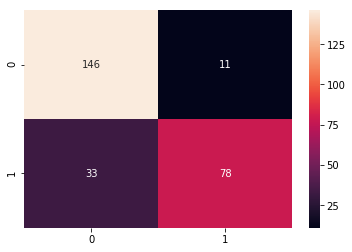

In [54]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, grid_y_pred)
sns.heatmap(confusion_matrix, annot=True, fmt="d")

# ROC AUC Curve¶

In [55]:
from sklearn.metrics import roc_curve
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, grid_y_pred)

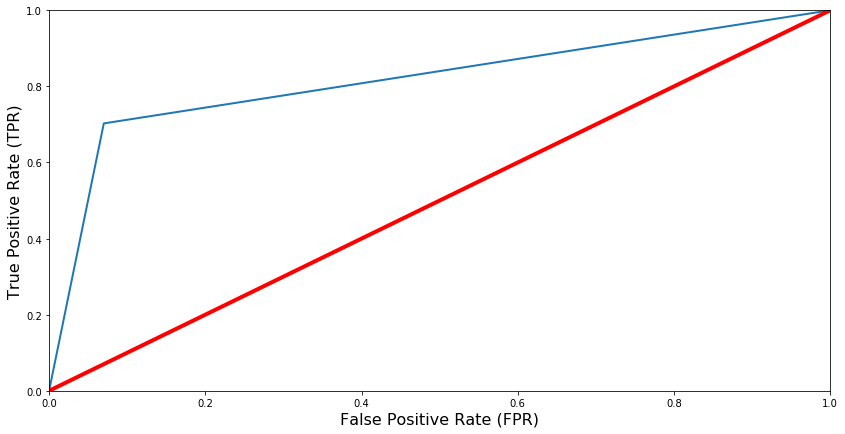

In [56]:
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

In [57]:
from sklearn.metrics import roc_auc_score
roc_auc_score = roc_auc_score(y_test, grid_y_pred)
print("Roc score: ", round(roc_auc_score,2)*100, "%")

Roc score:  82.0 %
